<a href="https://colab.research.google.com/github/anujshetty/SearchAndResQ/blob/main/Starter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import time

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [109]:
import numpy as np
import random
import matplotlib.pyplot as plt
from IPython import display
from matplotlib.colors import ListedColormap

from Gridworld import Gridworld
from utils import visualize_grid, policy_score, simulate_policy
from __future__ import unicode_literals
from Learning import QLearning, EpsilonGreedyExploration, FixedPolicy, ValueIteration


max residual :  49.99999990796704 | max iterations :  10000
Not converged, max iteration reached


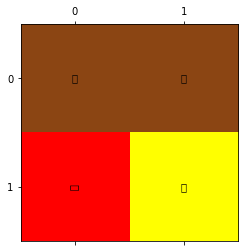

In [150]:
g_rand = Gridworld(gridworld_length=2, gridworld_width=2, num_obstacles=0,
                 collisionReward= -1, destinationReward= 5, defaultReward= 0, outOfBoundsReward = -1, 
                 failChance= 0.1, gamma= 0.95)
#eps_greedy_policy =  EpsilonGreedyExploration(0.6, alpha=0.9)
#qlearning_model = QLearning(g_rand, 0.2)
offline_policy = ValueIteration(g_rand, gamma=0.9, residual = 0.01, maxIter = 10000)
#print(qlearning_model.Q.shape)
visualize_grid(g_rand)
#print(g_rand.state)

In [149]:
#print(offline_policy.U)
print(offline_policy.policy)


[[[[[[0. 0. 3.]
     [0. 1. 0.]
     [0. 0. 0.]]

    [[0. 3. 4.]
     [0. 0. 0.]
     [0. 0. 0.]]

    [[3. 0. 5.]
     [0. 0. 4.]
     [5. 0. 0.]]]


   [[[0. 0. 0.]
     [0. 0. 3.]
     [0. 0. 0.]]

    [[3. 0. 0.]
     [0. 0. 0.]
     [0. 0. 4.]]

    [[0. 0. 0.]
     [0. 0. 0.]
     [4. 0. 0.]]]


   [[[0. 0. 0.]
     [0. 0. 0.]
     [0. 0. 0.]]

    [[0. 3. 0.]
     [0. 0. 0.]
     [1. 3. 3.]]

    [[2. 0. 0.]
     [0. 0. 0.]
     [4. 0. 0.]]]


   [[[0. 2. 4.]
     [4. 0. 0.]
     [3. 0. 3.]]

    [[0. 3. 0.]
     [0. 0. 5.]
     [0. 0. 0.]]

    [[0. 0. 2.]
     [0. 0. 0.]
     [0. 0. 0.]]]]



  [[[[0. 0. 0.]
     [0. 0. 0.]
     [0. 0. 0.]]

    [[0. 0. 0.]
     [0. 0. 0.]
     [0. 5. 0.]]

    [[0. 0. 0.]
     [0. 0. 0.]
     [0. 0. 0.]]]


   [[[0. 0. 0.]
     [0. 0. 0.]
     [0. 0. 0.]]

    [[0. 0. 0.]
     [0. 0. 0.]
     [0. 0. 0.]]

    [[0. 0. 0.]
     [4. 0. 0.]
     [0. 0. 0.]]]


   [[[0. 0. 0.]
     [0. 0. 0.]
     [0. 0. 0.]]

    [[0. 0. 0.]
     [0. 0. 0.]
    

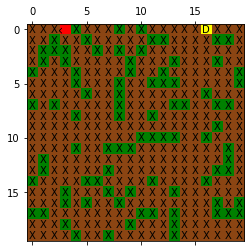

In [15]:
g_rand.reset_position()
visualize_grid(g_rand)

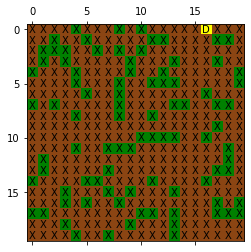

In [16]:
#for i in range(100000):
#    g_rand.reset_position()
#    simulate_policy(g_rand, policy_type="epsilon-greedy", model=qlearning_model, policy=eps_greedy_policy, 
#                    run_to_completion=False, num_iters=50, visualize=False)
visualize_grid(g_rand)

In [17]:
learned_policy = FixedPolicy(qlearning_model.extract_policy(), g_rand,qlearning_model)
print(learned_policy.policy)

In [18]:
# reset agent position in existing grid
g_rand.reset_position()

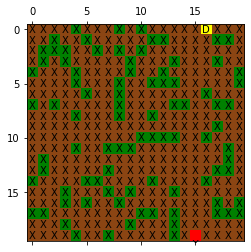

In [19]:
visualize_grid(g_rand)

In [143]:
#policy_score_learned = simulate_policy(g_rand, policy_type="fixed", model=None, policy=learned_policy, run_to_completion=True)
policy_score_learned = simulate_policy(g_rand, policy_type="offline", model=offline_policy, policy=None, run_to_completion=True)

TypeError: ignored

In [144]:
visualize_grid(g_rand)

TypeError: ignored

In [ ]:
print(policy_score_learned)

In [35]:
print(type(g_rand.state_to_ind(g_rand.state)))
print(type(g_rand.state))

<class 'list'>
<class 'list'>
